# EDA - Sao Paulo Subway

## Passenger transported by lines - From January 2017 to April 2023

This is one step for the Monitoring and Predicting Subway Passenger Demand in São Paulo City Using Machine Learning project developed in Omdena collaborative platform, São Paulo local chapter. The link for the project is here [Omdena São Paulo Chapter](https://omdena.com/local-chapters/sao-paulo-brazil-chapter/).

@author: Rogerio Chaves

Github: https://github.com/Rogerio-Chaves

## Import libraries

In [60]:
from datetime import datetime
from matplotlib.style import use
from IPython.display import display

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

use('seaborn-v0_8')
%matplotlib inline

## Load passenger transported by lines dataset

In [61]:
data = pd.read_csv('ptl_complete.csv', index_col='year_month')

## Passengers transforted by line - Metrics

In [62]:
def metric_graph(metric):
    color_lines = {1: 'blue', 2: 'green', 3:'red', 4: 'yellow', 5: 'purple', 15: 'silver'}
    
    figure = plt.figure(figsize=(10, 5))
    plt.plot(data[data['line'] == 1][metric].index, data[data['line'] == 1][metric].values, color=color_lines[1])
    plt.plot(data[data['line'] == 2][metric].index, data[data['line'] == 2][metric].values, color=color_lines[2])
    plt.plot(data[data['line'] == 3][metric].index, data[data['line'] == 3][metric].values, color=color_lines[3])
    plt.plot(data[data['line'] == 4][metric].index, data[data['line'] == 4][metric].values, color=color_lines[4])
    plt.plot(data[data['line'] == 5][metric].index, data[data['line'] == 5][metric].values, color=color_lines[5])
    plt.plot(data[data['line'] == 15][metric].index, data[data['line'] == 15][metric].values, color=color_lines[15])
    plt.title(f'Passengers transforted by line - {metric.upper()}')
    plt.xlabel('Date')
    plt.ylabel('Number of passengers')
    plt.xticks(data.index[[i.split('-')[1] == '01' for i in data.index]].unique(), rotation=75)
    display()

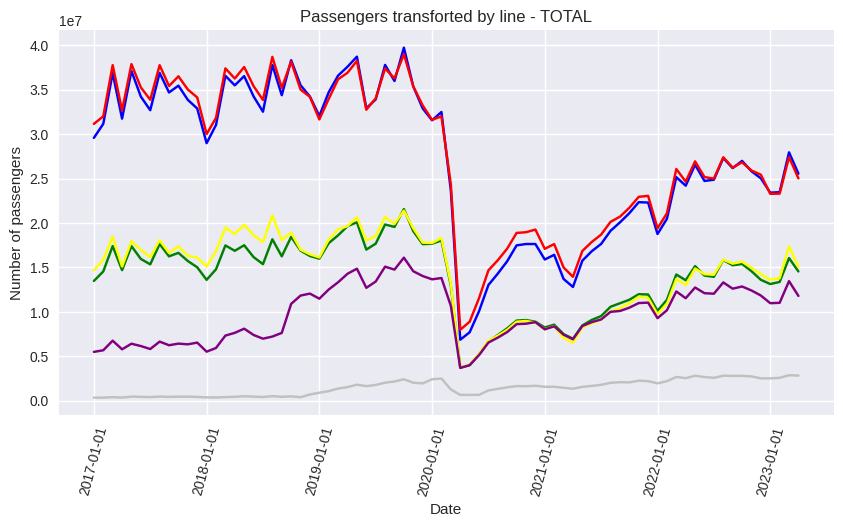

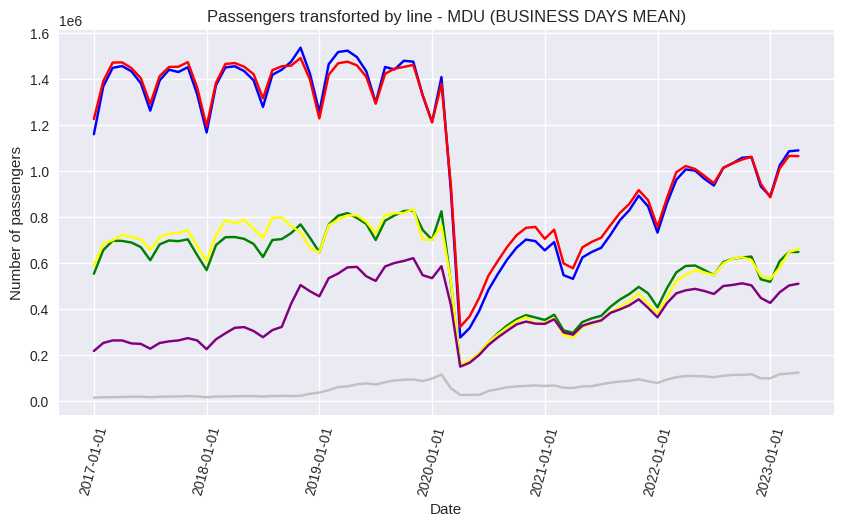

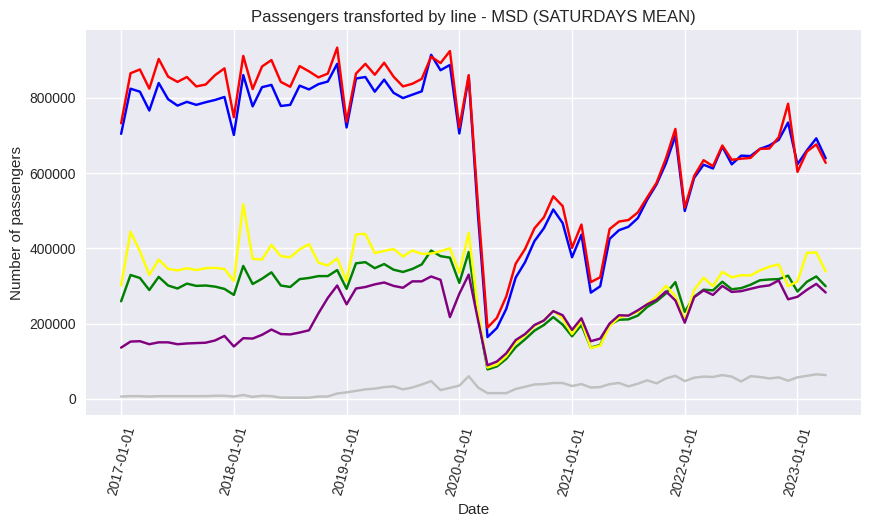

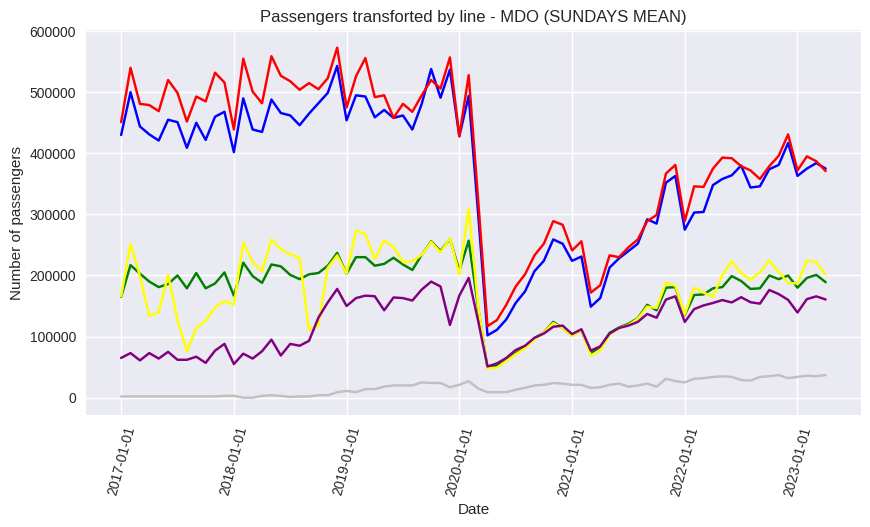

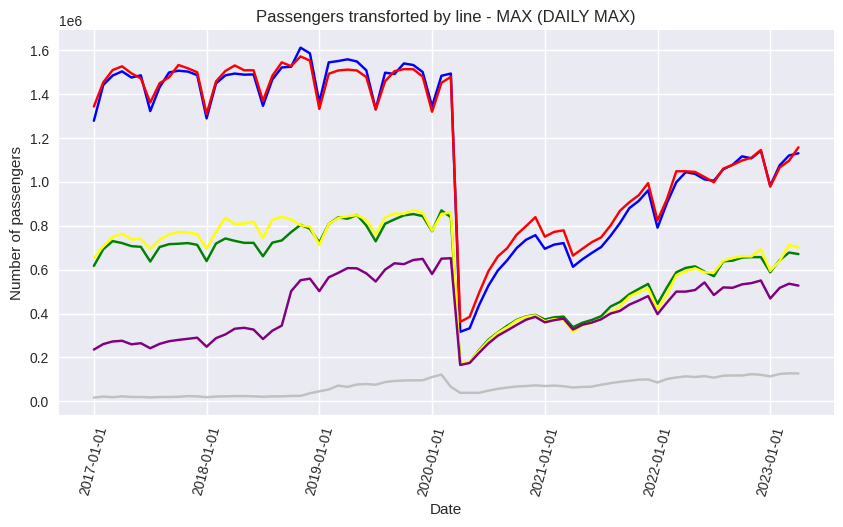

In [63]:
metrics = data.columns[1:]
for metric in metrics:
    metric_graph(metric)

We can see the impact of COVID pandemic for passenger transported demand in the subway.

## Lines 1 and 3 monthly participation in total of demand (in %) - Passenger transported demand by line'

In [64]:
totals = data.groupby(by='year_month').sum().drop(labels='line', axis=1).loc[:,'total']

line_01_sum = data[data.loc[:,'line'] == 1].loc[:,'total']
line_03_sum = data[data.loc[:,'line'] == 3].loc[:,'total']
participation_line1_line2 = ((line_01_sum + line_03_sum) / totals) * 100

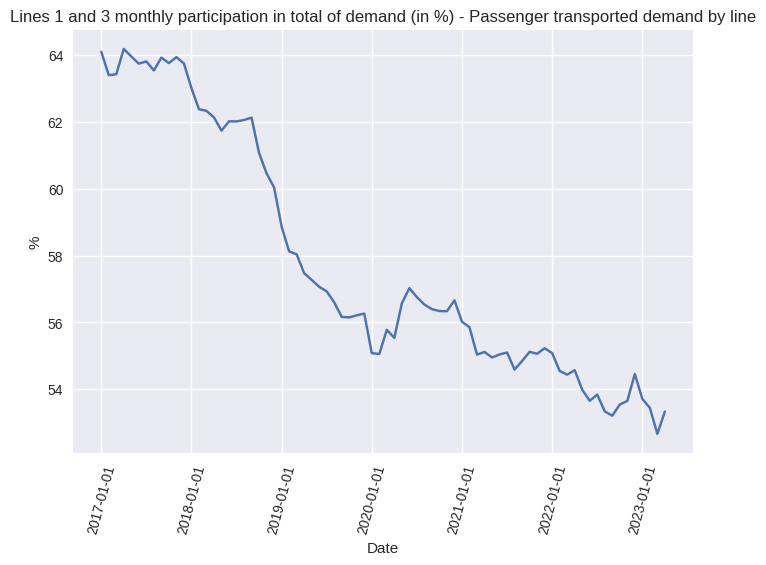

In [65]:
plt.plot(participation_line1_line2.index, participation_line1_line2.values)
plt.title('Lines 1 and 3 monthly participation in total of demand (in %) - Passenger transported demand by line')
plt.xlabel('Date')
plt.ylabel('%')
plt.xticks(participation_line1_line2.index[[i.split('-')[1] == '01' for i in participation_line1_line2.index]].unique(), 
           rotation=75)
plt.show()

<b>Question</b>

If the monthly share of the two lines with the highest passenger demand is decreasing over time, is there any possibility that other lines are growing?

R: Below we can verify the share of each line.

## Monthly participation in total of demand (in %) by line

In [66]:
def participation_measurement(line, color, df, totals):
    
    line_sum = df[df.loc[:,'line'] == line].loc[:,'total']
    participation_line = (line_sum / totals) * 100

    figure = plt.figure(figsize=(10, 5))
    plt.plot(participation_line.index, participation_line.values, color=color)
    plt.title(f'Monthly participation in total of demand (in %) - Line {line}')
    plt.xlabel('Date')
    plt.ylabel('%')
    plt.xticks(participation_line1_line2.index[[i.split('-')[1] == '01' for i in participation_line1_line2.index]].unique(), 
               rotation=75)
    display()
        

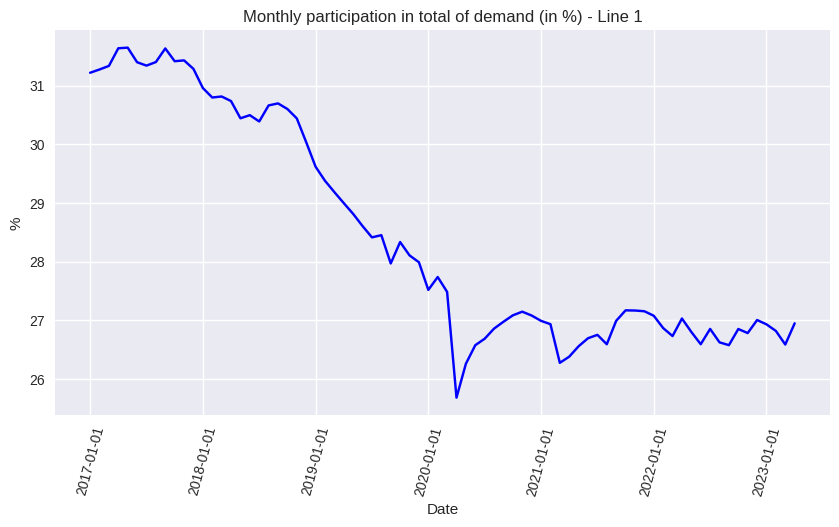

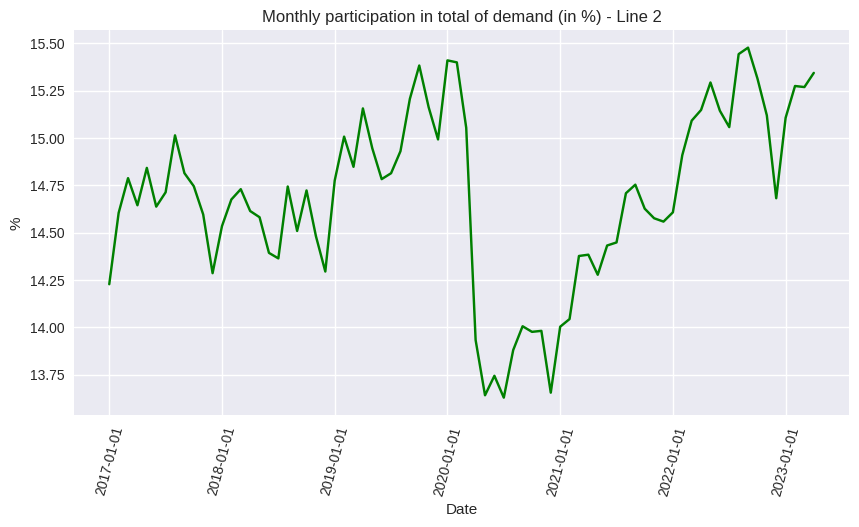

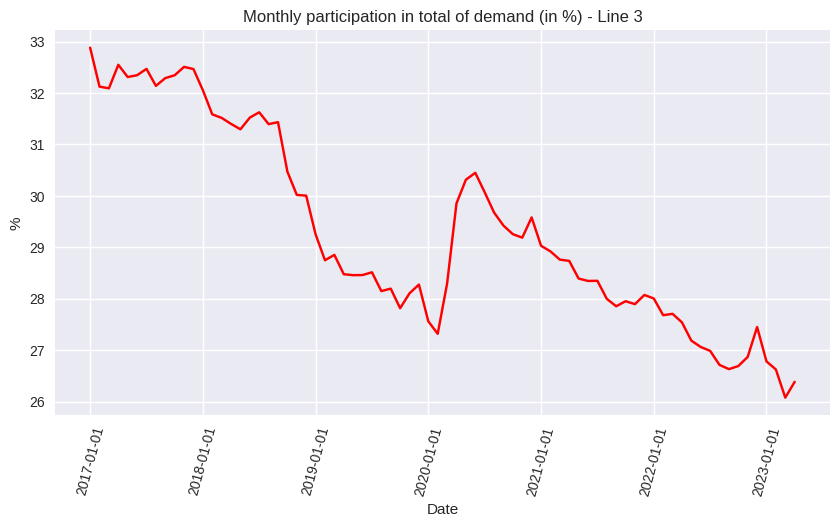

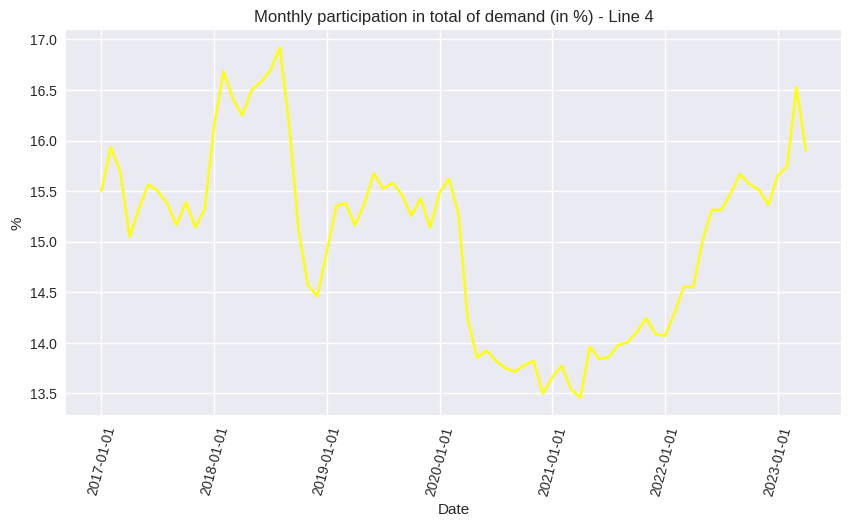

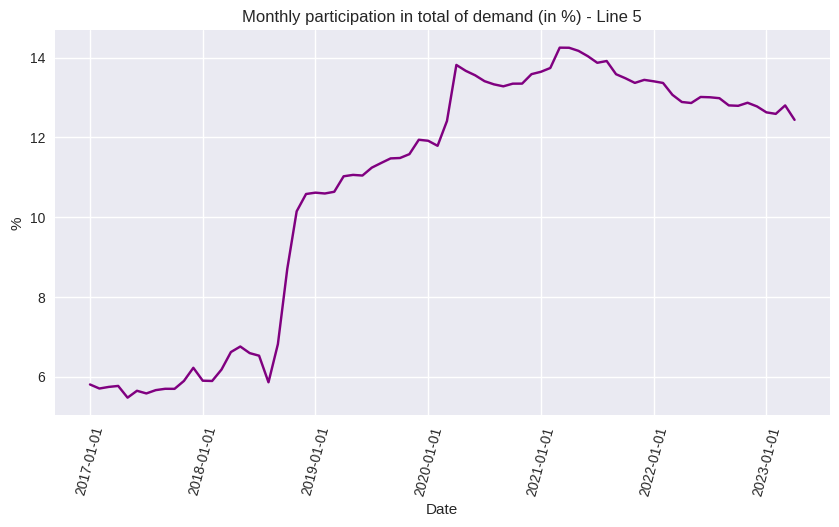

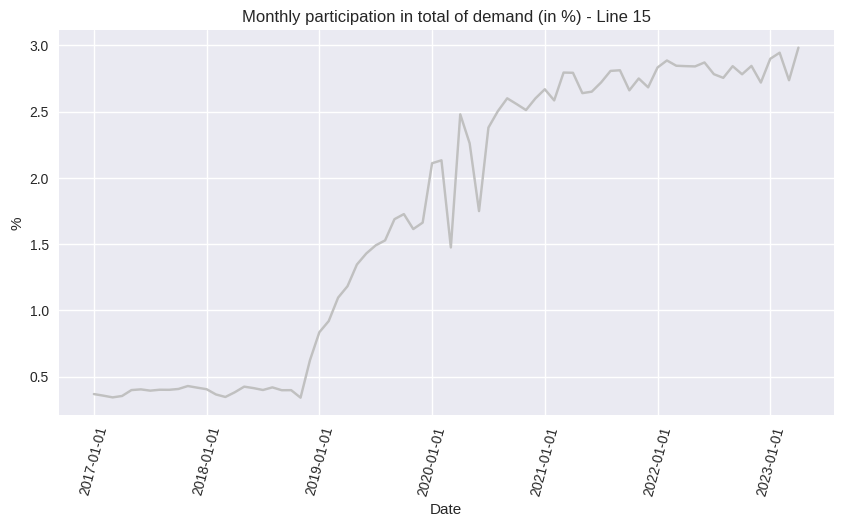

In [67]:
lines = [1, 2, 3, 4, 5, 15]
color_lines = {1: 'blue', 2: 'green', 3:'red', 4: 'yellow', 5: 'purple', 15: 'silver'}

for line in lines:
    participation_measurement(line, color_lines[line], data, totals)

As we can see,

**Line 1 - blue** has kept the same participation after the COVID period. Although, it has decreased in the previous period.

**Line 2 - green**, after the fall caused by the COVID pandemic, recovered the participation level previous.

**Line 3 - red** is decreasing, inclusive with this pattern before of COVID pandemic.

**Line 4 - yellow**, after the COVID period shows a growing pattern in demand for passengers in your line.
	
**Line 5 - lilac** kept a growing pattern until the begun 2021, next it has slowly decreasing.
		
Finally, **line 15 - silver** has a growing pattern in this period. Although, the participation of this line is small yet.

## Infrastructure changes - New stations on the São Paulo Subway System - timeline

In [68]:
line_04 = {'station': ['São Paulo - Morumbi', 'Higienópolis - Mackenzie', 'Oscar Freire', 'Vila Sônia'],
            'inauguration': ['2018-12-27', '2018-01-23', '2018-04-04', '2021-12-17'],
            'line': [4, 4, 4, 4]}
line_04['inauguration'] = [datetime.strptime(d, "%Y-%m-%d") for d in line_04['inauguration']]
        
line_05 = {'station':['Alto da Boa Vista', 'Borba Gato', 'Brooklin', 'Eucaliptos', 'Moema', 'Hospital São Paulo', 'Santa Cruz', 'Chácara Kablin', 'AACD - Servidor', 'Campo Belo'], 
           'inauguration': ['2017-09-06', '2017-09-06', '2017-09-06', '2018-03-02', '2018-04-05', '2018-09-28', '2018-09-28', '2018-09-28', '2018-08-31', '2019-04-08'],
          'line': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}
line_05['inauguration'] = [datetime.strptime(d, "%Y-%m-%d") for d in line_05['inauguration']]
        
line_15 = {'station':['São Lucas', 'Camilo Haddad', 'Vila Tolstói', 'Vila União', 'jardim Planalto', 'Sapopemba', 'Fazenda da Juta', 'São Mateus', 'jardim Colonial'], 
           'inauguration':['2018-04-06', '2018-04-06', '2018-04-06', '2018-04-06', '2019-08-26', '2019-12-16', '2019-12-16', '2019-12-16', '2021-12-16'],
          'line': [15, 15, 15, 15, 15, 15, 15, 15, 15]}
line_15['inauguration'] = [datetime.strptime(d, "%Y-%m-%d") for d in line_15['inauguration']]

line_04_df = pd.DataFrame(line_04)
line_05_df = pd.DataFrame(line_05)
line_15_df = pd.DataFrame(line_15)

df = pd.concat([line_04_df, line_05_df, line_15_df], axis=0)
df.sort_values(by='inauguration', inplace=True)

line_colors = {4: 'yellow', 5: 'purple', 15: 'silver'}
levels = np.tile([-9, 9, -7, 7 -5, 5, -3, 3, -1, 1], int(np.ceil(df.shape[0]/6)))[:df.shape[0]]

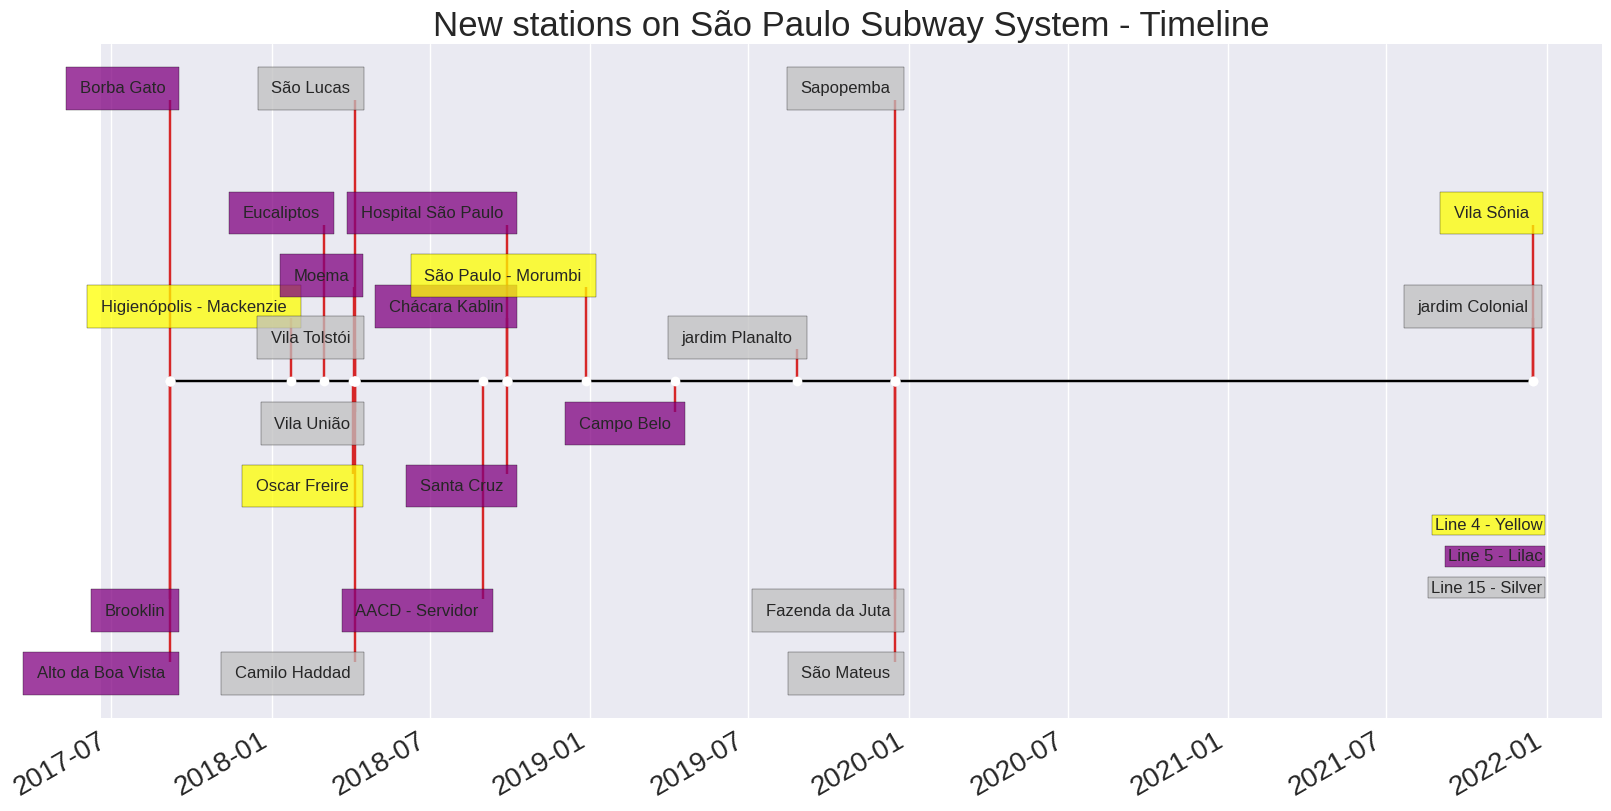

In [69]:
fig, ax = plt.subplots(figsize=(16, 8), layout="constrained")
ax.set_title('New stations on São Paulo Subway System - Timeline', fontsize=25)

ax.vlines(list(df.inauguration), 0, levels, color="tab:red")
ax.plot(list(df.inauguration), np.zeros_like(list(df.inauguration)), "-o",
        color="k", markerfacecolor="w")

for d, l, r, line in zip(list(df.inauguration), levels, list(df.station), list(df.line)):
	ax.annotate(r, xy=(d, l),
            xytext=(-3, np.sign(l)*3), textcoords="offset points", size='large',
            horizontalalignment="right",
            verticalalignment="bottom" if l > 0 else "top", bbox={'facecolor': line_colors[line], 'alpha': 0.75, 'pad': 10})

ax.annotate('Line 4 - Yellow', xy=(datetime.strptime('2022-01-01', "%Y-%m-%d"), -5),
                xytext=(-3, np.sign(l)*3), textcoords="offset points", size='large',
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top", bbox={'facecolor': 'yellow', 'alpha': 0.75, 'pad': 2})

ax.annotate('Line 5 - Lilac', xy=(datetime.strptime('2022-01-01', "%Y-%m-%d"), -6),
                xytext=(-3, np.sign(l)*3), textcoords="offset points", size='large',
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top", bbox={'facecolor': 'purple', 'alpha': 0.75, 'pad': 2})

ax.annotate('Line 15 - Silver', xy=(datetime.strptime('2022-01-01', "%Y-%m-%d"), -7),
                xytext=(-3, np.sign(l)*3), textcoords="offset points", size='large',
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top", bbox={'facecolor': 'silver', 'alpha': 0.75, 'pad': 2})
    
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",fontsize=20)
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.margins(y=0.1)
plt.show()